<center> <h1>Binary Classification </h1> </center> 
<center> <h3> Realised by :<br>Ghamgui Eya<br>
Makhlouf Roua<br>Meddeb Hamza <br> Mhadhbi Siwar </h3> 
</center> 

# Introduction: 

The aim of this notebook is to test the several models we have studied during the course of SD210 for a binary classification task. 

For this notebook we will coop with a binary balanced dataset composed of 1000 images of ants and 1000  images of grapes.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC

In [6]:
#read the data
ant_data = np.load ('G_10_ant.npy')
n0 = len (ant_data) # number of ant draws
print ("The number of ant draws : ", n0 )

grapes_data = np.load ('G_10_grapes.npy')
n1 = len (grapes_data) # number of grapes draws 
print ("The number of grapes draws : ", n1 )

data = np.vstack ((ant_data, grapes_data)) # combine the ant and grapes data
labels = np.hstack ((np.zeros(n0), np.ones(n1))).astype (np.int)
class_names = ['ant', 'grape']

The number of ant draws :  1000
The number of grapes draws :  1000


In [7]:
n_samples = len (data)
n_features = data.shape [1]
img_rows, img_cols =int (np.sqrt (data.shape[1])), int (np.sqrt (data.shape[1])) 

print ("The number of samples : ", n_samples) 
print ("Image shape ", (img_rows, img_cols))

#split the data into training and test set 

train_size = 0.8
X_train , X_test , y_train , y_test = train_test_split (data, labels, train_size=train_size , 
                                                        shuffle = True, stratify= labels, 
                                                        random_state = 0)

The number of samples :  2000
Image shape  (28, 28)


In [8]:
def plot_images (X , y, title ):
  """Plot images using the data X and the labels y"""
  n_images = 21
  X = X.reshape (-1 , img_rows , img_cols)
  plt.figure (figsize=(20,10))
  plt.set_cmap('gray')
  plt.suptitle (title)
  for i in range (n_images):
    ax = plt.subplot (3,7,i+1)
    ax.imshow (X[i, :, : ])
    ax.axis ('off')
    ax.set_title (class_names[y[i]])
plt.show ()

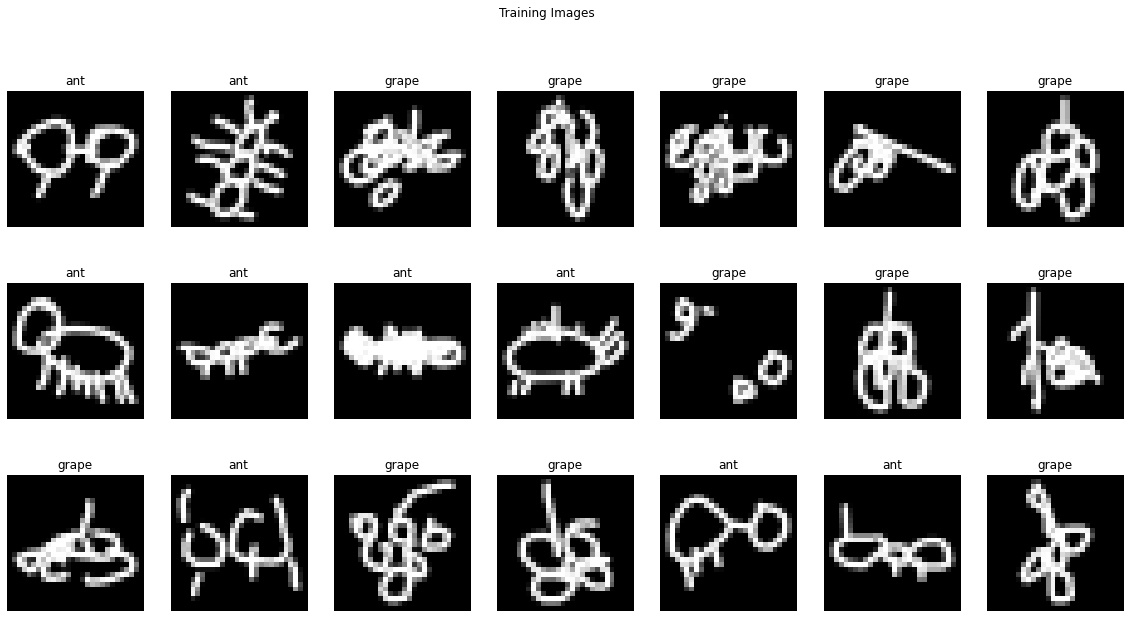

In [9]:
plot_images (X_train , y_train , "Training Images")

In [10]:
#Now let's try to visualise the data on 2D plot 
from sklearn.decomposition import PCA 
pca = PCA (random_state=0)
pca.fit (X_train)
X_train_pca = pca.transform (X_train)
X_test_pca = pca.transform (X_test)

Text(0, 0.5, 'Explained variance %')

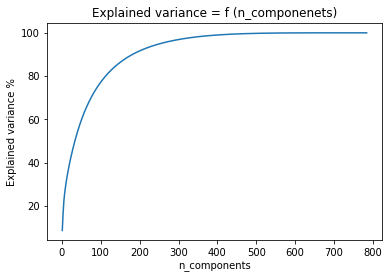

In [11]:
#plot the explained variance 
explained_var= pca.explained_variance_ratio_

plt.title ('Explained variance = f (n_componenets)')
plt.plot (np.arange (1,n_features+1), np.cumsum (explained_var)*100)
plt.xlabel ('n_components')
plt.ylabel ('Explained variance %')

In [12]:
print ('The Explained variance by the two first principal componenets is : ', round (np.sum (explained_var[:2])*100,2) ," %") 

The Explained variance by the two first principal componenets is :  13.12  %


In [13]:
#project the data on the two first principal components 
pca = PCA (n_components=2,random_state=0)
X_train_pca2 = pca.fit_transform (X_train)
X_test_pca2 = pca.transform (X_test)

The first two principal components represent only 13% of the variance of the data.

Text(0, 0.5, 'Second principal componenet')

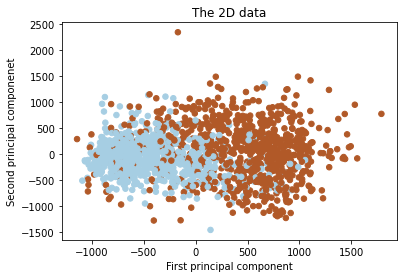

In [14]:
#plot the 2D data
plt.title ("The 2D data")
plt.scatter(X_train_pca2[:, 0], X_train_pca2 [:, 1], c=y_train, s=30, cmap=plt.cm.Paired)
plt.xlabel ("First principal component")
plt.ylabel ("Second principal componenet")

As we can see the data is not linearly separable.

For SVC and tree classifiers we won't use all the feature space. Instead, we will only use the features that explain 99% of the data variance.

In [15]:
#calculate the number of components that explain 99% of the data variation 
nbr_component = 0
var= 0 
while (var < 0.99): 
  var+= explained_var [nbr_component]
  nbr_component+=1
print ("To explain 99% of the data variation we need " + str (nbr_component) +' components instead of ' + str (n_features))

To explain 99% of the data variation we need 400 components instead of 784


Using 400 features instead of 784 features will fasten the calculation and will not deteriorate the performance of the models.

In [16]:
# Let's project the data on 400 components
pca = PCA (n_components=nbr_component ,random_state=0)
X_train_pca = pca.fit_transform (X_train)
X_test_pca = pca.transform (X_test)

### Linear SVC

Let's try to fit a linear SVC to the training without hyperparameters tuning and see what happens.

In [17]:
#Please don't run this cell because a takes a long time
#%%time 
#clf = SVC (kernel='linear', random_state =0)
#clf.fit (X_train_pca, y_train)
#print ("Linear SVC train score", clf.score (X_train_pca , y_train))
#print("Linear SVC  test score :",clf.score(X_test_pca , y_test))

Fitting an SVM to a training data of 1600 samples and 400 features takes a long time.

Let's try to train the same model with the same number of samples but using only two features and see if it accelerates the computations.

In [ ]:
%%time 
clf = SVC (kernel='linear', random_state =0)
clf.fit (X_train_pca2, y_train)
print ("Linear SVC train score", clf.score (X_train_pca2 , y_train))
print("Linear SVC  test score :",clf.score(X_test_pca2 , y_test))

Linear SVC train score 0.848125
Linear SVC  test score : 0.86
CPU times: user 3min 52s, sys: 141 ms, total: 3min 52s
Wall time: 3min 52s


Text(0, 0.5, 'Second principal component')

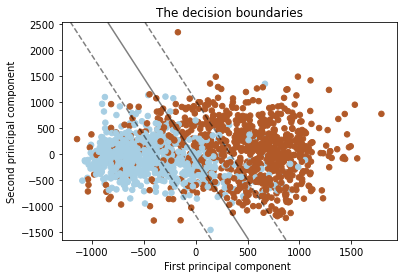

In [ ]:
#Let's draw the decision boundaries 

plt.scatter(X_train_pca2[:, 0], X_train_pca2[:, 1], c=y_train, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

  # plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
             linestyles=['--', '-', '--'])
ax.set_title ("The decision boundaries")
ax.set_xlabel ("First principal component ")
ax.set_ylabel ("Second principal component")

Although we reduced the number of features from 400 to only 2 features, we still have a long computation time to train the svm to the training data. Thus, looking for the best hyperparameters will also take a long time.

In fact, the svm is based on the kernel trick calculation which means that the model needs to calculate the kernel matrix of size 1600*1600 which is computationally expensive.

For this part we will use a subset of 100 samples instead of 1600 samples to train the model and sees what happens.

In [18]:
index = np.random.randint (low=0 , high=len(X_train) , size= 100)
X_train_subset = X_train_pca2[index]
y_train_subset = y_train [index]
print ("The shape of the subset is ", X_train_subset.shape)

The shape of the subset is  (100, 2)


In [19]:
%%time
clf_subset = SVC (kernel='linear', random_state =0)
clf_subset.fit (X_train_subset , y_train_subset)
print ("Linear SVC train score", clf_subset.score (X_train_subset , y_train_subset))
print("Linear SVC  test score :",clf_subset.score(X_test_pca2 , y_test))

Linear SVC train score 0.86
Linear SVC  test score : 0.8525
CPU times: user 4.81 s, sys: 0 ns, total: 4.81 s
Wall time: 4.83 s


The first thing we notice is that reducing the number of samples from 1600 to 100 reduces the computation time from 3min 52 s to 8s.

Reducing the number of samples, the model doesn't overfit to the training data and gives approxiamtely the same performance when we train using the whole dataset.

Let's draw the decision boundary and see if the boundary has changed or not.

Text(0, 0.5, 'Second principal component')

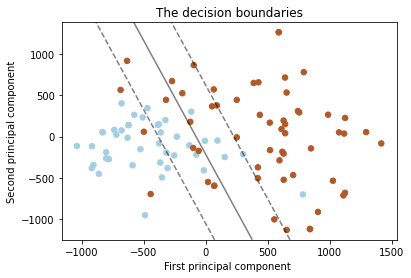

In [ ]:
plt.scatter(X_train_subset[:, 0], X_train_subset[:, 1], c=y_train_subset, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf_subset.decision_function(xy).reshape(XX.shape)

  # plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
             linestyles=['--', '-', '--'])
ax.set_title ("The decision boundaries")
ax.set_xlabel ("First principal component ")
ax.set_ylabel ("Second principal component")

Using a small subset of the training data doesn't deteriorate the performance of the model. 

Now let's tune the hyperparameters of the linear svm.

In [ ]:
# Find the best working C with a 5-fold cross-validation
svc  = SVC(kernel='linear', random_state=0)
p_grid_svc = {"C": [0.001,0.01,0.1,0.5,1]}
grid_svc = GridSearchCV(estimator= svc , param_grid = p_grid_svc , cv= 5)
grid_svc.fit(X_train_subset , y_train_subset)
print("Best params: {}".format(grid_svc.best_params_))
print("Best Validation Score: {}".format(grid_svc.best_score_))
print ("Linear SVC train score", grid_svc.score (X_train_subset , y_train_subset))
print("Linear SVC test score :",grid_svc.score(X_test_pca2 , y_test))

Best params: {'C': 0.001}
Best Validation Score: 0.85
Linear SVC train score 0.84
Linear SVC test score : 0.86


The Svc tends to select a very small C. This result was expected since the data is not linearly separable. Thus, slack variables will have important values and in order to minimize the objectif loss function of the svm the model will pick a very small value for C (This is what we call a soft margin SVM). 

The Svc gives a decent performance for the classification of the images. But, using more complex boundaries may help improving the accuracy.

# Non Linear SVC (Polynomial and Gaussian Kernel)

In [20]:
# train a gaussian SVC 
gau_svc = SVC(kernel='rbf', random_state=0)
p_grid_gau_svc = {"C": [0.001,0.01,0.1,0.5,1], "gamma": [0.01,0.05,0.1,0.5,1]}
grid_gau_svc = GridSearchCV(estimator= gau_svc , param_grid = p_grid_gau_svc , cv= 5)
grid_gau_svc.fit(X_train_subset , y_train_subset)
print ("The performance of a gaussian Svc: ")
print("Best params: {}".format(grid_gau_svc.best_params_))
print("Best Validation Score: {}".format(grid_gau_svc.best_score_))
print ("SVM train score", grid_gau_svc.score (X_train_subset , y_train_subset))
print("SVM test score :",grid_gau_svc.score(X_test_pca2 , y_test))

The performance of a gaussian Svc: 
Best params: {'C': 1, 'gamma': 0.01}
Best Validation Score: 0.56
SVM train score 1.0
SVM test score : 0.505


In [21]:
poly_svc= SVC(kernel='poly', random_state=0)
p_grid_poly_svc = {"C": [0.001,0.01,0.1,0.5,1], "degree": [2,3,4,5]} # Here I didn't use the degree 1. Otherwise, gridsearch will select the linear svc
grid_poly_svc = GridSearchCV(estimator= poly_svc , param_grid = p_grid_poly_svc , cv= 5)
grid_poly_svc.fit(X_train_subset , y_train_subset)
print ("The performance of a polynomial Svc: ")
print("Best params: {}".format(grid_poly_svc.best_params_))
print("Best Validation Score: {}".format(grid_poly_svc.best_score_))
print ("SVM train score", grid_poly_svc.score (X_train_subset , y_train_subset))
print("SVM test score :",grid_poly_svc.score(X_test_pca2 , y_test))

The performance of a polynomial Svc: 
Best params: {'C': 0.5, 'degree': 3}
Best Validation Score: 0.8099999999999999
SVM train score 0.8
SVM test score : 0.7625


Using a more complex boundary doesn't help improving the Performance.

# Binary Classification Tree

In [15]:
from sklearn.tree import DecisionTreeClassifier

First, let's use the same subset we used to train the svc and see if the classification tree imporves the accuracy of the classification task.

In [18]:
tree_clf = DecisionTreeClassifier(random_state=0)
tree_clf.fit (X_train_subset, y_train_subset)
print ("Tree classifier train score: ", tree_clf.score (X_train_subset, y_train_subset))
print ("Tree classifier test score:  ", tree_clf.score (X_test_pca2 ,y_test))

Tree classifier train score:  1.0
Tree classifier test score:   0.7975


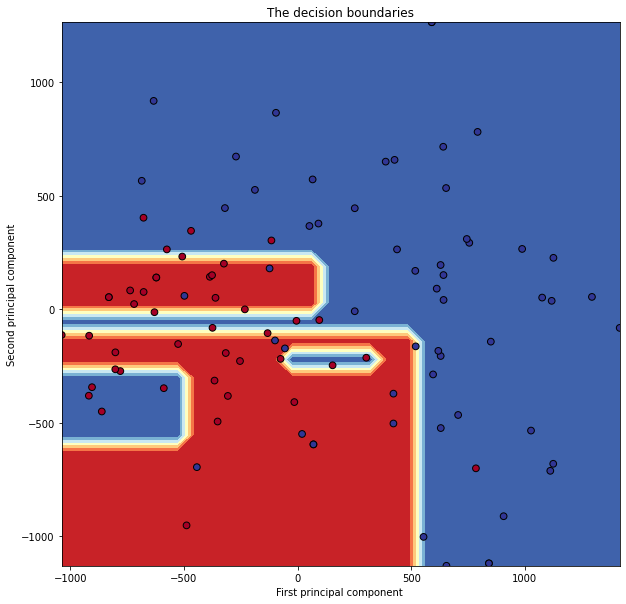

In [ ]:
ax = plt.figure (figsize= (10 , 10))
xlim = (np.min (X_train_subset [: , 0]), np.max (X_train_subset[: ,0 ]))
ylim = (np.min (X_train_subset [: , 1]), np.max (X_train_subset[: ,1 ]))

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = tree_clf.predict(xy).reshape(XX.shape)
#plt the decision boundary
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

plt.title ("The decision boundaries")
plt.xlabel ("First principal component ")
plt.ylabel ("Second principal component")

plt.scatter(X_train_subset[:, 0], X_train_subset[:, 1], c=y_train_subset, cmap=plt.cm.RdYlBu, edgecolor='black', s=45)

Using a tree classification model with the default hyperparameters, we overfit to the training data. This result was expected since a tree classifier divides the $\mathbb{R}^2$ feature space 
into a piecewise constant intervals.

We can fight overfitting by: 
- Tuning the hyperparameters of the tree (The depth of the tree , minimum number of samples to split a node of the tree , minimum number of samples per leaf)
- Data augmentation (In our case use all the training data and using 400  features) 

First, let's try tuning  the hyperparameters of the tree classifier.

In [ ]:
tree_clf =  DecisionTreeClassifier(random_state=0)
p_grid_tree = {'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15,20], 'min_samples_leaf' : [2,3,4,5,6,7,8,9,10,11,12,13,14,15] } 
grid_tree = GridSearchCV(estimator= tree_clf , param_grid = p_grid_tree , cv= 5, scoring= 'f1')
grid_tree.fit(X_train_subset , y_train_subset)
print("Best Validation Score: {}".format(grid_tree.best_score_))
print("Best params: {}".format(grid_tree.best_params_))
print("Tree train score :",grid_tree.score(X_train_subset , y_train_subset))
print("Tree test score :",grid_tree.score(X_test_pca2 , y_test))

Best Validation Score: 0.9005821764442455
Best params: {'min_samples_leaf': 5, 'min_samples_split': 12}
Tree train score : 0.9203539823008849
Tree test score : 0.8522167487684729


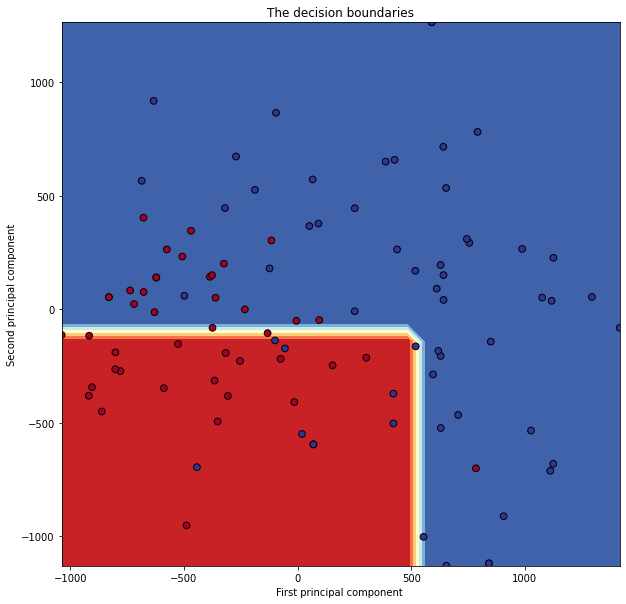

In [ ]:
#Let's plot the decision boundary
tree_best_clf = grid_tree.best_estimator_

ax = plt.figure (figsize= (10 , 10))
xlim = (np.min (X_train_subset [: , 0]), np.max (X_train_subset[: ,0 ]))
ylim = (np.min (X_train_subset [: , 1]), np.max (X_train_subset[: ,1 ]))

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = tree_best_clf.predict(xy).reshape(XX.shape)
#plt the decision boundary
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

plt.title ("The decision boundaries")
plt.xlabel ("First principal component ")
plt.ylabel ("Second principal component")

plt.scatter(X_train_subset[:, 0], X_train_subset[:, 1], c=y_train_subset, cmap=plt.cm.RdYlBu, edgecolor='black', s=45)


Tuning the hyperparameters of the tree, we obtain a more regularized decision boundary and thus we reduce the overfitting to the training data.

Now, before using all the training dataset and 400 features let's try using all the dataset but with only 2 features and see what happens.

In [ ]:
#hyperparameter Tuning
tree_clf =  DecisionTreeClassifier(random_state=0)
p_grid_tree = {'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15,20], 'min_samples_leaf' : [2,3,4,5,6,7,8,9,10,11,12,13,14,15] } 
grid_tree = GridSearchCV(estimator= tree_clf , param_grid = p_grid_tree , cv= 5, scoring= 'f1')
grid_tree.fit(X_train_pca2 , y_train)
print("Best Validation Score: {}".format(grid_tree.best_score_))
print("Best params: {}".format(grid_tree.best_params_))
print("Tree train score :",grid_tree.score(X_train_pca2 , y_train))
print("Tree test score :",grid_tree.score(X_test_pca2 , y_test))

#Select the best model 
tree_clf = grid_tree.best_estimator_

Best Validation Score: 0.8524664742944313
Best params: {'min_samples_leaf': 15, 'min_samples_split': 2}
Tree train score : 0.875
Tree test score : 0.8564231738035265


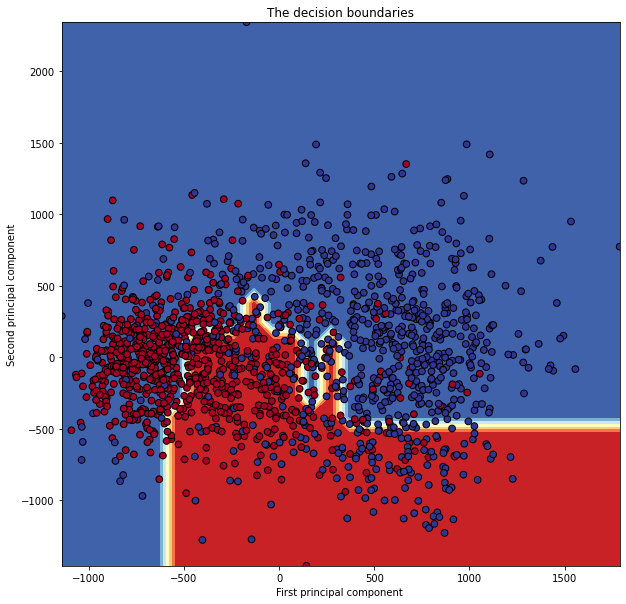

In [ ]:
ax = plt.figure (figsize= (10 , 10))
xlim = (np.min (X_train_pca2 [: , 0]), np.max (X_train_pca2[: ,0 ]))
ylim = (np.min (X_train_pca2 [: , 1]), np.max (X_train_pca2[: ,1 ]))

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = tree_clf.predict(xy).reshape(XX.shape)
#plt the decision boundary
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

plt.title ("The decision boundaries")
plt.xlabel ("First principal component ")
plt.ylabel ("Second principal component")

plt.scatter(X_train_pca2[:, 0], X_train_pca2[:, 1], c=y_train, cmap=plt.cm.RdYlBu, edgecolor='black', s=45)

Using more samples reduces more the overfitting to the training data.

Now let's try to fit a decision tree classifier with the whole dataset and with 400 features.

In [ ]:
#Please don't run this cell it will takes a long time to execute
%%time
tree_clf =  DecisionTreeClassifier(random_state=0)
p_grid_tree = {'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15,20], 'min_samples_leaf' : [2,3,4,5,6,7,8,9,10,11,12,13,14,15] } 
grid_tree = GridSearchCV(estimator= tree_clf , param_grid = p_grid_tree , cv= 5, scoring= 'f1')
grid_tree.fit(X_train_pca , y_train)
print("Best Validation Score: {}".format(grid_tree.best_score_))
print("Best params: {}".format(grid_tree.best_params_))
print("Tree train score :",grid_tree.score(X_train_pca , y_train))
print("Tree test score :",grid_tree.score(X_test_pca , y_test))

Best Validation Score: 0.8166645373104803
Best params: {'min_samples_leaf': 13, 'min_samples_split': 2}
Tree train score : 0.9034700315457413
Tree test score : 0.8020565552699229


Using more features didn't help avoiding overfitting to the training data and improving the accuracy of the classification task.

Now let's try to fit random forest classifier on the whole training dataset and see if it helps avoid overfitting.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
RF=RandomForestClassifier(random_state=0)
p_grid_RF = {'n_estimators': [10,15,20,25,30,40,50,75,100], 'min_samples_leaf': [2,3,4,5,6], 'max_features': ['sqrt','log2']}   
grid_RF = GridSearchCV(estimator=RF , param_grid=p_grid_RF, cv=5)
grid_RF.fit(X_train_pca , y_train.ravel())

print("Best Validation Score: {}".format(grid_RF.best_score_))
print("Best params: {}".format(grid_RF.best_params_))
print("Random Forest Train score :",grid_RF.score(X_train_pca,y_train))
print("Random Forest Test score :",grid_RF.score(X_test_pca,y_test))

Best Validation Score: 0.845
Best params: {'max_features': 'sqrt', 'min_samples_leaf': 5, 'n_estimators': 100}
Random Forest Train score : 0.99625
Random Forest Test score : 0.8525


Same as tree classifier, increasing the number of features didn't help reducing the overfitting for random forest classifier.

Let's try training a random forest classifier using only 100 features (10 features per tree).

In [ ]:
# Let's project the data on 100 components
pca = PCA (n_components= 100 ,random_state=0)
X_train_pca100 = pca.fit_transform (X_train)
X_test_pca100 = pca.transform (X_test)

In [ ]:
RF=RandomForestClassifier(random_state=0, max_features='sqrt')
p_grid_RF = {'n_estimators': [10,15,20,25,30,40,50,75,100], 'min_samples_leaf': [2,3,4,5,6,10,15], 'max_leaf_nodes': [5,6,7,8,9,10,11,12,13,14,15]}   
grid_RF = GridSearchCV(estimator=RF , param_grid=p_grid_RF, cv=5)
grid_RF.fit(X_train_pca100 , y_train.ravel())

print("Best Validation Score: {}".format(grid_RF.best_score_))
print("Best params: {}".format(grid_RF.best_params_))
print("Random Forest Train score :",grid_RF.score(X_train_pca100,y_train))
print("Random Forest Test score :",grid_RF.score(X_test_pca100,y_test))

Best Validation Score: 0.8643750000000001
Best params: {'max_leaf_nodes': 14, 'min_samples_leaf': 3, 'n_estimators': 40}
Random Forest Train score : 0.89125
Random Forest Test score : 0.8575


Reducing the number of features helps reducing the overfitting to the training data same result found for tree classifiers.

**Conculsion (SVC and Tree Classifier) :**

For SVC, the model is very sensitive to the number of samples since an SVC is based on the calculation of the kernel of size **n_samples X n_samples**. Thus training and hyperparameter tuning is computationally expensive. 

For Tree classification models, the model is less sensitive to the number of samples in the training data.

Both SVM and Classification trees are sensitive to number of features. 

In our case we are using a small training dataset composed of 1600 images with a very low resolution of size **28 X 28** (i.e 784 features). 

In real world problems, we use huge datasets with images of high resolution. Thus, training a svm or a classification tree is not a great idea for image processing. Instead, we can use deep neural networks or convolutional neural networks.




# One hidden layer neural network

For this part we will use the whole training dataset.
First, we need the normalize the data.

In [19]:
X_train = X_train /255
X_test = X_test /255

In [ ]:
from tensorflow.keras.layers import Dense , BatchNormalization, Input , Flatten, Conv2D, Dropout, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers.advanced_activations import LeakyReLU

#Create the model
model  = Sequential ()
model.add (Dense (units=64, activation='relu', input_shape= (n_features,))) #add the hidden layer
model.add (BatchNormalization())
model.add (Dense (units=1 , activation= 'sigmoid'))

#display the model summary 
model.summary()


Model: "sequential_49"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_85 (Dense)             (None, 64)                50240     
_________________________________________________________________
batch_normalization_36 (Batc (None, 64)                256       
_________________________________________________________________
dense_86 (Dense)             (None, 1)                 65        
Total params: 50,561
Trainable params: 50,433
Non-trainable params: 128
_________________________________________________________________


In [ ]:
 #compile the model 
 model.compile (optimizer= Adam (0.01) , loss='binary_crossentropy', metrics=['accuracy'] )

In [ ]:
n_epochs= 15
batch_size= 32
model.fit (X_train, y_train , epochs=n_epochs, batch_size= batch_size, validation_split=0.1)

Epoch 1/15
45/45 [==============================] - 1s 6ms/step - loss: 0.5352 - accuracy: 0.7748 - val_loss: 1.4370 - val_accuracy: 0.5250
Epoch 2/15
45/45 [==============================] - 0s 3ms/step - loss: 0.3332 - accuracy: 0.8703 - val_loss: 0.6748 - val_accuracy: 0.6625
Epoch 3/15
45/45 [==============================] - 0s 3ms/step - loss: 0.2927 - accuracy: 0.8815 - val_loss: 0.3424 - val_accuracy: 0.8375
Epoch 4/15
45/45 [==============================] - 0s 3ms/step - loss: 0.2298 - accuracy: 0.9138 - val_loss: 0.3613 - val_accuracy: 0.8625
Epoch 5/15
45/45 [==============================] - 0s 3ms/step - loss: 0.2163 - accuracy: 0.9253 - val_loss: 0.3648 - val_accuracy: 0.8562
Epoch 6/15
45/45 [==============================] - 0s 2ms/step - loss: 0.1733 - accuracy: 0.9357 - val_loss: 0.4167 - val_accuracy: 0.8625
Epoch 7/15
45/45 [==============================] - 0s 3ms/step - loss: 0.1434 - accuracy: 0.9481 - val_loss: 0.3886 - val_accuracy: 0.8313
Epoch 8/15
45/45 [==

Accuracy:  0.7925


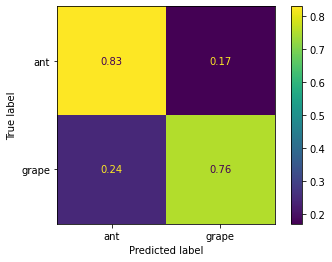

In [ ]:
#test the performance of the model on the test data 
y_pred= (model.predict (X_test) > 0.5).astype(np.int)
print ("Accuracy: ", accuracy_score (y_test , y_pred))
ConfusionMatrixDisplay (confusion_matrix (y_test ,y_pred.ravel(), normalize='true'),display_labels= class_names).plot()

Using this architecture the model overfits to the training data. To avoid overfitting we will apply these solutions: 

* Data augmentation 
* Add regularization
* Using a lower learning rate and a bigger batch_size
* Use early stopping

In [ ]:
#reshape the data
X_train = X_train.reshape (-1, img_rows, img_rows , 1)
X_test = X_test.reshape (-1, img_rows, img_rows , 1)

In [ ]:
train_image_generator = ImageDataGenerator (horizontal_flip = True ,  
            rotation_range= 10, width_shift_range=0.2 , height_shift_range=0.2)

n_train= int (0.8*len (X_train)) # we will use 20% of the data as a validation dataset
train_generator = train_image_generator.flow (X_train [:n_train,: ,: ,:] , y_train[:n_train])

validation_image_generator = ImageDataGenerator ()
validation_generator = validation_image_generator.flow (X_train[n_train: , : ,: ,:], y_train [n_train:])

In [ ]:
#Create the model

model  = Sequential ()

model.add (Input ((img_rows, img_cols , 1)) )
model.add (Flatten())

model.add (Dense (units=128, activation='relu', input_shape= (n_features,), kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
    bias_regularizer=regularizers.l2(1e-4),
    activity_regularizer=regularizers.l2(1e-5))) #add the hidden layer + regularization

model.add (BatchNormalization())

model.add (Dense (units=1 , activation= 'sigmoid', kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
    bias_regularizer=regularizers.l2(1e-4),
    activity_regularizer=regularizers.l2(1e-5))) # add regularization

#display the model summary 
model.summary()

#compile the model 
model.compile (optimizer= Adam (0.001) , loss='binary_crossentropy', metrics=['accuracy'] ) #decrease the learning rate

Model: "sequential_55"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_20 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_97 (Dense)             (None, 128)               100480    
_________________________________________________________________
batch_normalization_42 (Batc (None, 128)               512       
_________________________________________________________________
dense_98 (Dense)             (None, 1)                 129       
Total params: 101,121
Trainable params: 100,865
Non-trainable params: 256
_________________________________________________________________


In [ ]:
#early stopping
from tensorflow.python.keras.callbacks import EarlyStopping
cb_early_stopper = EarlyStopping(monitor = 'val_loss', patience = 5)

In [ ]:
n_epochs= 30
batch_size= 64 # we increase the batch size 
model.fit (train_generator ,validation_data= validation_generator,  epochs=n_epochs, batch_size= batch_size
           ,callbacks =[cb_early_stopper]
           )

Epoch 1/30
40/40 [==============================] - 2s 19ms/step - loss: 0.6837 - accuracy: 0.6934 - val_loss: 0.9488 - val_accuracy: 0.5031
Epoch 2/30
40/40 [==============================] - 1s 14ms/step - loss: 0.5653 - accuracy: 0.7875 - val_loss: 0.8109 - val_accuracy: 0.5562
Epoch 3/30
40/40 [==============================] - 1s 14ms/step - loss: 0.4905 - accuracy: 0.8258 - val_loss: 0.7540 - val_accuracy: 0.5781
Epoch 4/30
40/40 [==============================] - 1s 13ms/step - loss: 0.5040 - accuracy: 0.8153 - val_loss: 0.5340 - val_accuracy: 0.7844
Epoch 5/30
40/40 [==============================] - 1s 13ms/step - loss: 0.4993 - accuracy: 0.8288 - val_loss: 0.6275 - val_accuracy: 0.7219
Epoch 6/30
40/40 [==============================] - 1s 13ms/step - loss: 0.4482 - accuracy: 0.8446 - val_loss: 0.4933 - val_accuracy: 0.8062
Epoch 7/30
40/40 [==============================] - 1s 13ms/step - loss: 0.4434 - accuracy: 0.8517 - val_loss: 0.4828 - val_accuracy: 0.8500
Epoch 8/30
40

Accuracy:  0.855


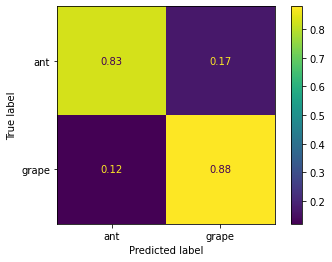

In [ ]:
#test the performance of the model on the test data 
y_pred= (model.predict (X_test) >0.5).astype(np.int)
print ("Accuracy: ", accuracy_score (y_test , y_pred))
ConfusionMatrixDisplay (confusion_matrix (y_test ,y_pred.ravel(), normalize='true'),display_labels= class_names).plot()

Adding regularization and data augmenatation reduces the overfitting to the training data. However, we can obtain a better result if we use convolutional neural network and transfer learning.

# Convolutional neural networks

In [ ]:
#define the model
model  = Sequential ()

model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(img_rows,img_cols,1),padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2),padding='same'))
model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))                  
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add (Flatten ())

model.add (Dense (units=128, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
    bias_regularizer=regularizers.l2(1e-4),
    activity_regularizer=regularizers.l2(1e-5)))

model.add (BatchNormalization())

model.add (Dense (units=1 , activation= 'sigmoid', kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
    bias_regularizer=regularizers.l2(1e-4),
    activity_regularizer=regularizers.l2(1e-5))) 

#display the model summary 
model.summary()

#compile the model 
model.compile (optimizer= Adam (0.0001) , loss='binary_crossentropy', metrics=['accuracy'] )


Model: "sequential_57"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_9 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_10 (LeakyReLU)   (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 7, 7, 128)       

In [ ]:
n_epochs= 30
batch_size= 64 # we increase the batch size 
model.fit (train_generator ,validation_data= validation_generator,  epochs=n_epochs, batch_size= batch_size
           ,callbacks =[cb_early_stopper]
           )

Epoch 1/30
40/40 [==============================] - 4s 78ms/step - loss: 0.6322 - accuracy: 0.7206 - val_loss: 0.7408 - val_accuracy: 0.5375
Epoch 2/30
40/40 [==============================] - 3s 73ms/step - loss: 0.4915 - accuracy: 0.8211 - val_loss: 0.7231 - val_accuracy: 0.6500
Epoch 3/30
40/40 [==============================] - 3s 72ms/step - loss: 0.5052 - accuracy: 0.8338 - val_loss: 0.7026 - val_accuracy: 0.7437
Epoch 4/30
40/40 [==============================] - 3s 73ms/step - loss: 0.4856 - accuracy: 0.8459 - val_loss: 0.6790 - val_accuracy: 0.8375
Epoch 5/30
40/40 [==============================] - 3s 72ms/step - loss: 0.4577 - accuracy: 0.8515 - val_loss: 0.6478 - val_accuracy: 0.8500
Epoch 6/30
40/40 [==============================] - 3s 73ms/step - loss: 0.3944 - accuracy: 0.8989 - val_loss: 0.6316 - val_accuracy: 0.8344
Epoch 7/30
40/40 [==============================] - 3s 72ms/step - loss: 0.4023 - accuracy: 0.8880 - val_loss: 0.5734 - val_accuracy: 0.8719
Epoch 8/30
40

Accuracy:  0.9375


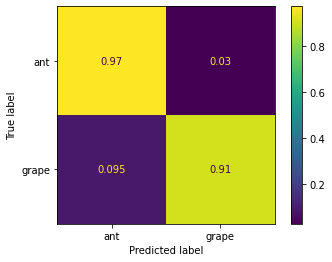

In [ ]:
#test the performance of the model on the test data 
y_pred= (model.predict (X_test) >0.5).astype(np.int)
print ("Accuracy: ", accuracy_score (y_test , y_pred))
ConfusionMatrixDisplay (confusion_matrix (y_test ,y_pred.ravel(), normalize='true'),display_labels= class_names).plot()

**Conclusion:** 

Comparing to SVM and Tree classifiers, in terms of computational time and performance a one hidden layer neural network and a deep convolutional neural network are better. 

Deep learning is suitable for image processing.